In [72]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler,Normalizer,StandardScaler,OneHotEncoder,LabelEncoder
from sklearn.feature_selection import mutual_info_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_log_error
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn import tree 
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor

In [2]:
df = pd.read_csv("car data.csv")
df

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


# DATA PREPROCESSING

In [3]:
df.shape

(301, 9)

In [4]:
df.head(10)

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0
6,ciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0
7,s cross,2015,6.50,8.61,33429,Diesel,Dealer,Manual,0
8,ciaz,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0
9,ciaz,2015,7.45,8.92,42367,Diesel,Dealer,Manual,0


In [5]:
df.tail(10)

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
291,brio,2015,5.40,6.10,31427,Petrol,Dealer,Manual,0
292,jazz,2016,6.40,8.40,12000,Petrol,Dealer,Manual,0
293,city,2010,3.25,9.90,38000,Petrol,Dealer,Manual,0
294,amaze,2014,3.75,6.80,33019,Petrol,Dealer,Manual,0
295,city,2015,8.55,13.09,60076,Diesel,Dealer,Manual,0
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.90,5464,Petrol,Dealer,Manual,0


In [6]:
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [7]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [8]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [10]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
296    False
297    False
298    False
299    False
300    False
Length: 301, dtype: bool

In [11]:
print(df['Fuel_Type'].value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64


In [12]:
print(df['Selling_type'].value_counts())

Selling_type
Dealer        195
Individual    106
Name: count, dtype: int64


In [13]:
print(df['Transmission'].value_counts())

Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


In [14]:
df = df.drop_duplicates()
df.duplicated().sum()

0

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 299 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       299 non-null    object 
 1   Year           299 non-null    int64  
 2   Selling_Price  299 non-null    float64
 3   Present_Price  299 non-null    float64
 4   Driven_kms     299 non-null    int64  
 5   Fuel_Type      299 non-null    object 
 6   Selling_type   299 non-null    object 
 7   Transmission   299 non-null    object 
 8   Owner          299 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 23.4+ KB


In [17]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [18]:
l = LabelEncoder()
df["Car_Name"] = l.fit_transform(df["Car_Name"])
df["Fuel_Type"] = l.fit_transform(df["Fuel_Type"])
df["Selling_type"] = l.fit_transform(df["Selling_type"])
df["Transmission"] = l.fit_transform(df["Transmission"])
df


C:\Users\bhautik\AppData\Local\Temp\ipykernel_8456\2887632029.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Car_Name"] = l.fit_transform(df["Car_Name"])
C:\Users\bhautik\AppData\Local\Temp\ipykernel_8456\2887632029.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Fuel_Type"] = l.fit_transform(df["Fuel_Type"])
C:\Users\bhautik\AppData\Local\Temp\ipykernel_8456\2887632029.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,90,2014,3.35,5.59,27000,2,0,1,0
1,93,2013,4.75,9.54,43000,1,0,1,0
2,68,2017,7.25,9.85,6900,2,0,1,0
3,96,2011,2.85,4.15,5200,2,0,1,0
4,92,2014,4.60,6.87,42450,1,0,1,0
...,...,...,...,...,...,...,...,...,...
296,69,2016,9.50,11.60,33988,1,0,1,0
297,66,2015,4.00,5.90,60000,2,0,1,0
298,69,2009,3.35,11.00,87934,2,0,1,0
299,69,2017,11.50,12.50,9000,1,0,1,0


# OUTLIER

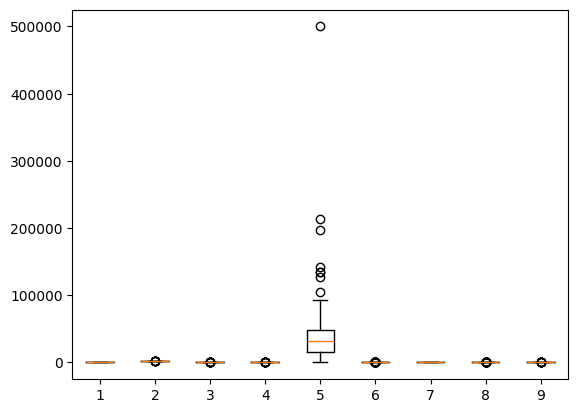

In [19]:
plt.boxplot(df)
plt.show()

In [21]:
df.clip(df.quantile(0.2),df.quantile(0.9),axis=1,inplace=True)

C:\Users\bhautik\AppData\Local\Temp\ipykernel_8456\3849381183.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[[2011.6]
 [2011.6]
 [2011.6]
 [2011.6]
 [2011.6]
 [2011.6]
 [2011.6]
 [2011.6]
 [2011.6]
 [2011.6]
 [2011.6]
 [2011.6]
 [2011.6]
 [2011.6]
 [2011.6]
 [2011.6]
 [2011.6]
 [2011.6]
 [2011.6]
 [2011.6]
 [2011.6]
 [2011.6]
 [2011.6]
 [2011.6]
 [2011.6]
 [2011.6]
 [2011.6]
 [2011.6]
 [2011.6]
 [2011.6]
 [2011.6]
 [2011.6]
 [2011.6]
 [2011.6]
 [2011.6]
 [2011.6]
 [2011.6]
 [2011.6]
 [2011.6]
 [2011.6]
 [2011.6]
 [2011.6]
 [2011.6]
 [2011.6]
 [2011.6]
 [2011.6]
 [2011.6]
 [2011.6]
 [2011.6]
 [2011.6]
 [2011.6]
 [2011.6]
 [2011.6]
 [2011.6]
 [2011.6]
 [2011.6]
 [2011.6]
 [2011.6]
 [2011.6]
 [2011.6]]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.clip(df.quantile(0.2),df.quantile(0.9),axis=1,inplace=True)
C:\Users\bhautik\AppData\Local\Temp\ipykernel_8456\384938118

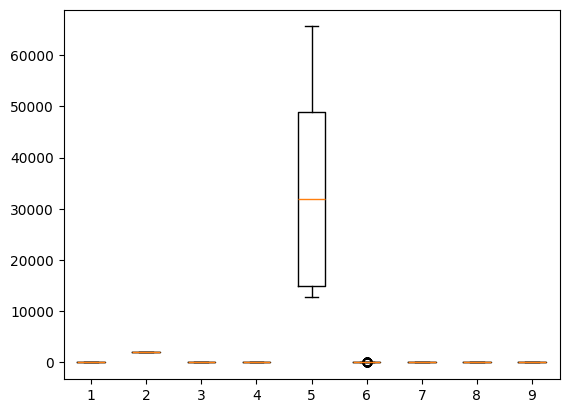

In [22]:
plt.boxplot(df)
plt.show()

In [23]:
x = df.drop(["Selling_Price"],axis=1)
y = df[["Selling_Price"]]

# DATA NORMALIZE 

In [28]:
s = Normalizer()
s_std = s.fit_transform(x)
s_std

array([[3.32407998e-03, 7.43855231e-02, 2.06462301e-04, ...,
        0.00000000e+00, 3.69342220e-05, 0.00000000e+00],
       [2.13718935e-03, 4.67626322e-02, 2.21617243e-04, ...,
        0.00000000e+00, 2.32303190e-05, 0.00000000e+00],
       [5.27178330e-03, 1.56370396e-01, 7.63633316e-04, ...,
        0.00000000e+00, 7.75262250e-05, 0.00000000e+00],
       ...,
       [1.05133449e-03, 3.06502096e-02, 1.67604050e-04, ...,
        0.00000000e+00, 1.52367318e-05, 0.00000000e+00],
       [5.34930639e-03, 1.56370304e-01, 9.69077245e-04, ...,
        0.00000000e+00, 7.75261796e-05, 0.00000000e+00],
       [5.11679794e-03, 1.56294919e-01, 4.57410725e-04, ...,
        0.00000000e+00, 7.75272416e-05, 0.00000000e+00]])

In [29]:
df1 = pd.DataFrame(s_std,columns=['Car_Name', 'Year', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'])
df1["Selling_Price"] = y
df1

,Car_Name,Year,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Selling_Price
0,0.003324,0.074386,0.000206,0.997224,0.000074,0.0,0.000037,0.0,3.35
1,0.002137,0.046763,0.000222,0.998904,0.000037,0.0,0.000023,0.0,4.75
2,0.005272,0.156370,0.000764,0.987684,0.000155,0.0,0.000078,0.0,7.25
3,0.007133,0.155960,0.000322,0.987738,0.000155,0.0,0.000078,0.0,2.85
4,0.002165,0.047391,0.000162,0.998874,0.000038,0.0,0.000024,0.0,4.60
...,...,...,...,...,...,...,...,...,...
294,0.002027,0.059211,0.000341,0.998243,0.000047,0.0,0.000029,0.0,3.75
295,0.001099,0.033564,0.000098,0.999436,0.000033,0.0,0.000017,0.0,8.55
296,0.001051,0.030650,0.000168,0.999530,0.000030,0.0,0.000015,0.0,9.30
297,0.005349,0.156370,0.000969,0.987684,0.000124,0.0,0.000078,0.0,4.00


# EDA

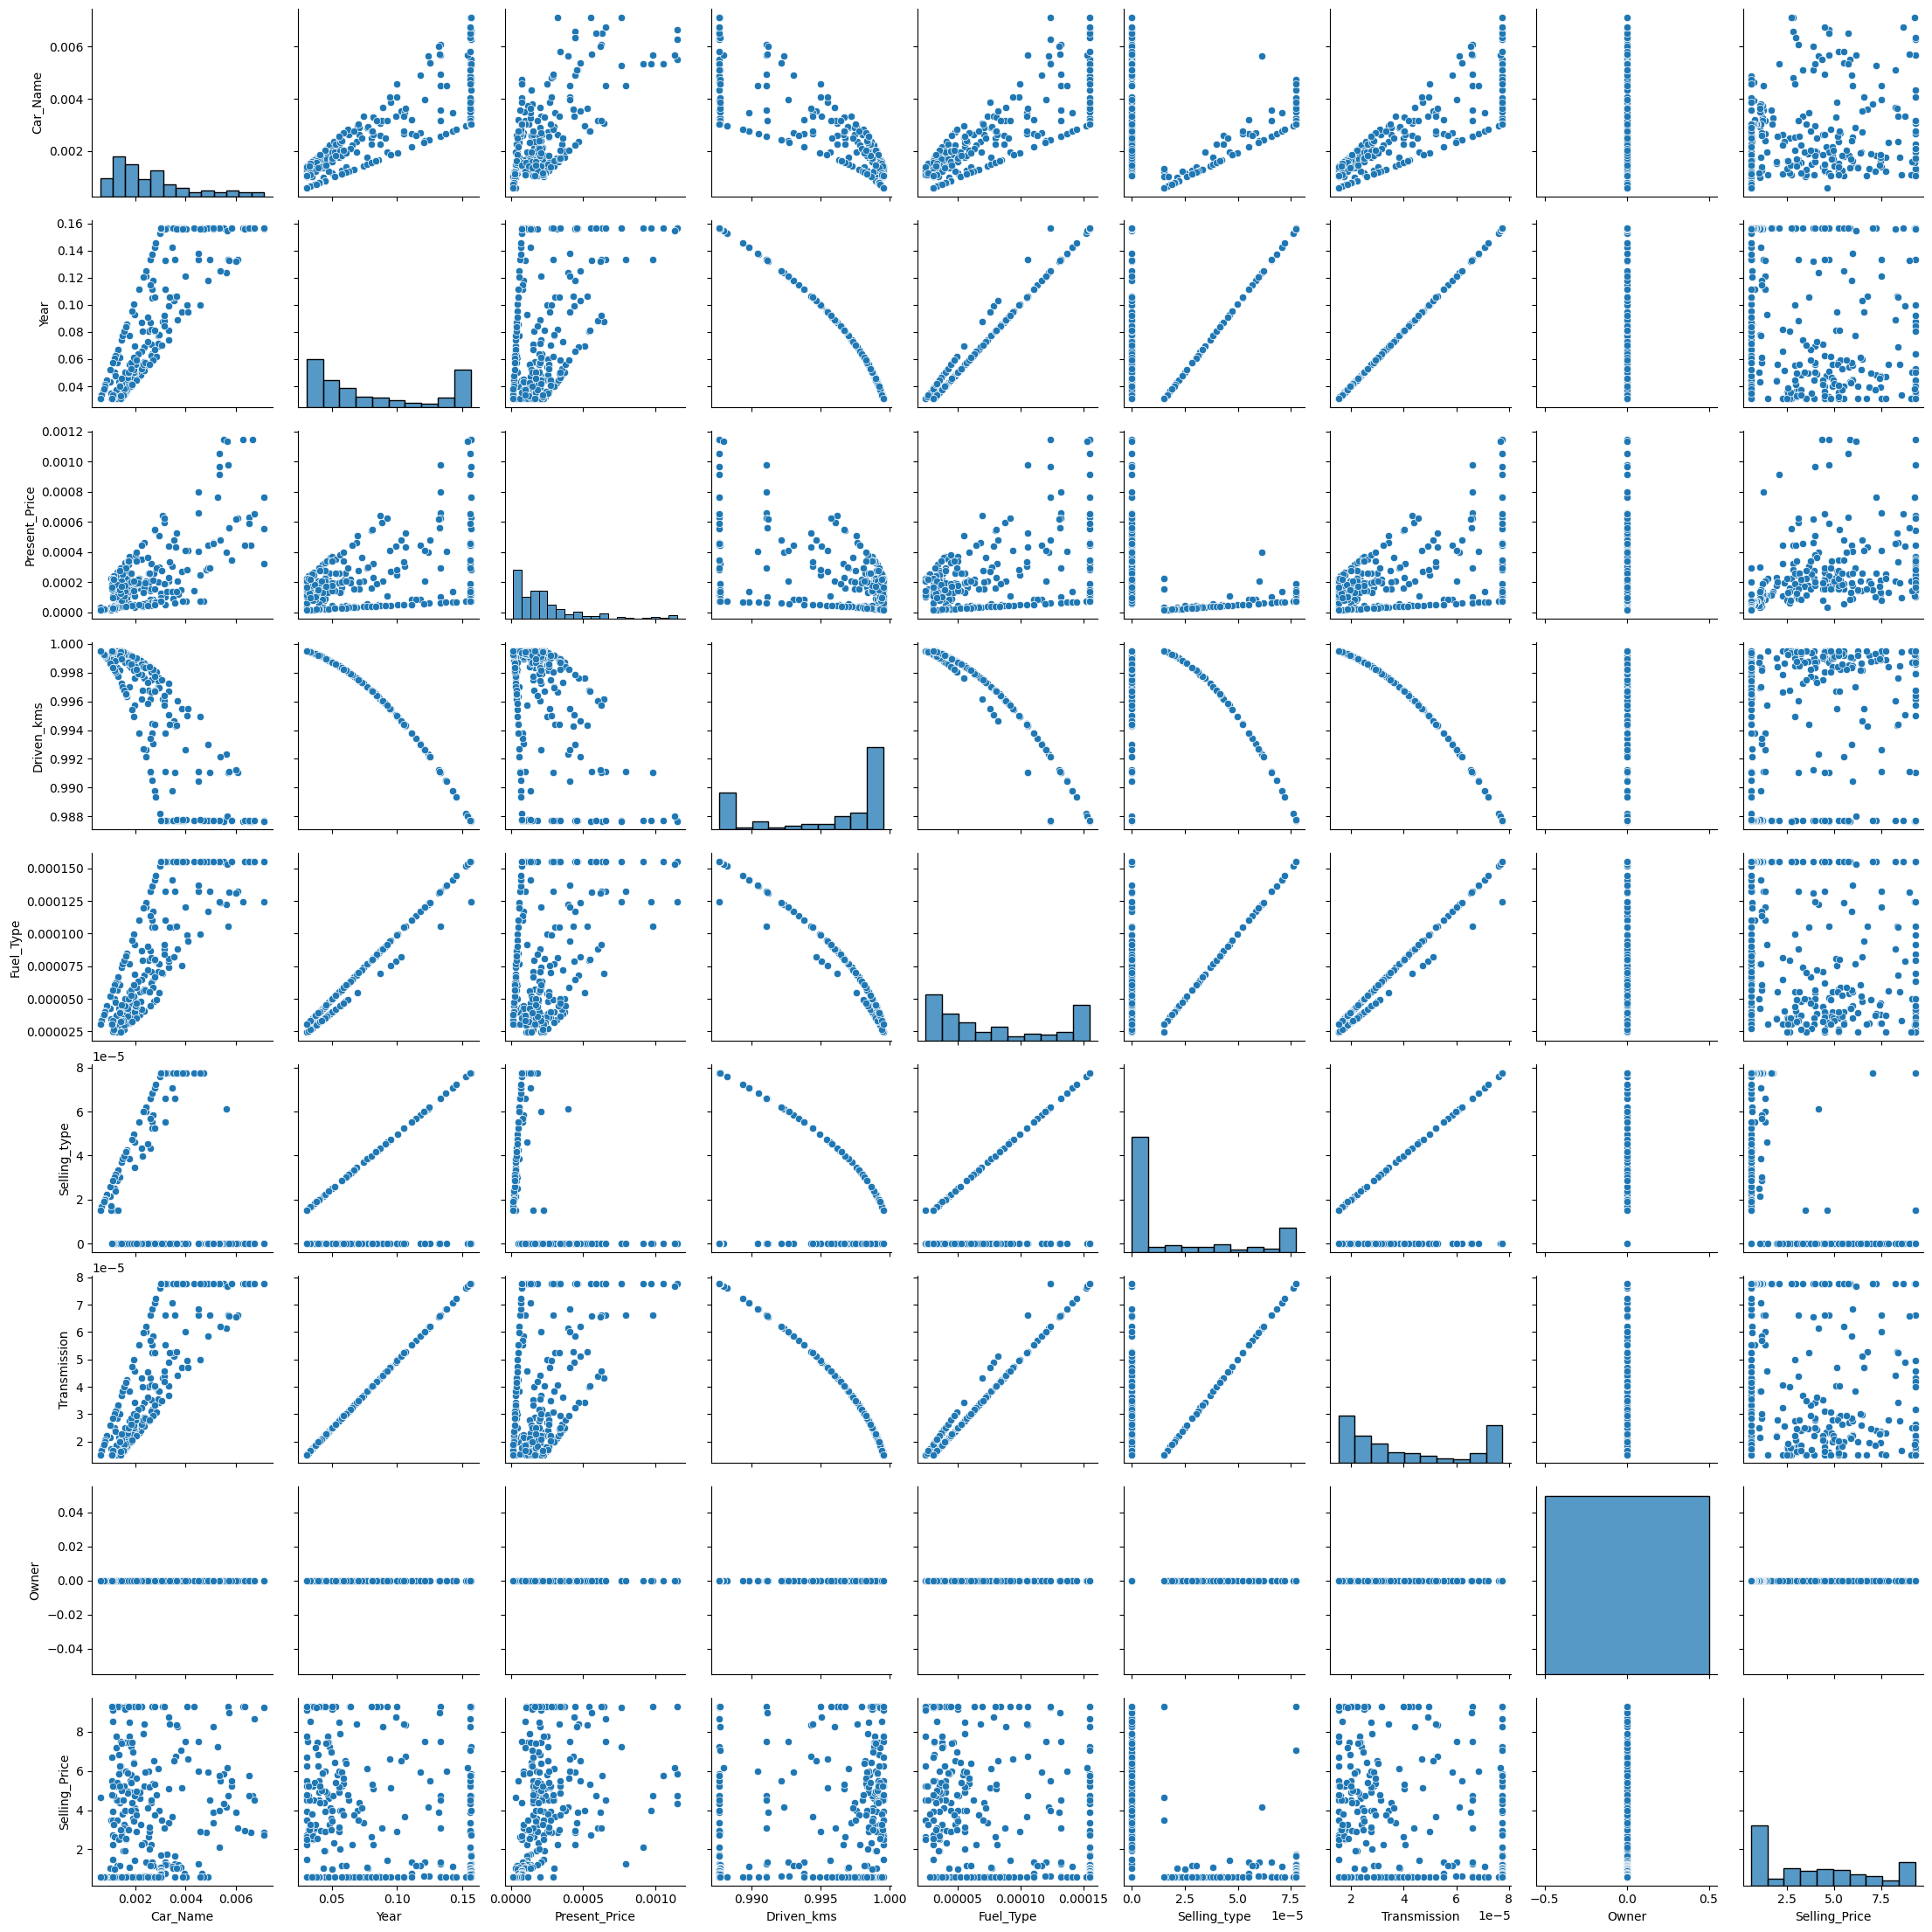

In [30]:
sns.pairplot(df1)

<Axes: >

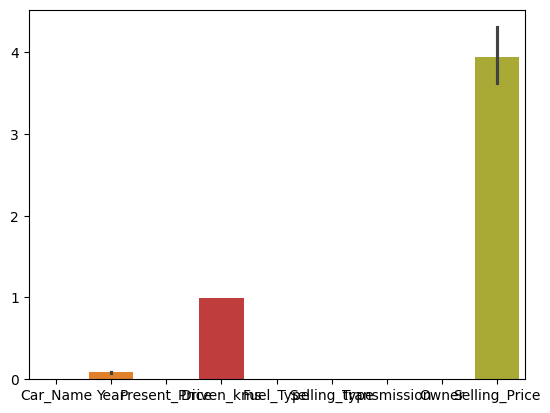

In [31]:
sns.barplot(df1)

<Axes: ylabel='Count'>

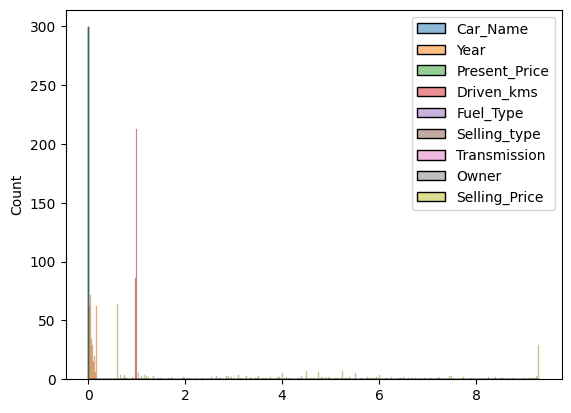

In [32]:
sns.histplot(df1)

<Figure size 1000x600 with 0 Axes>

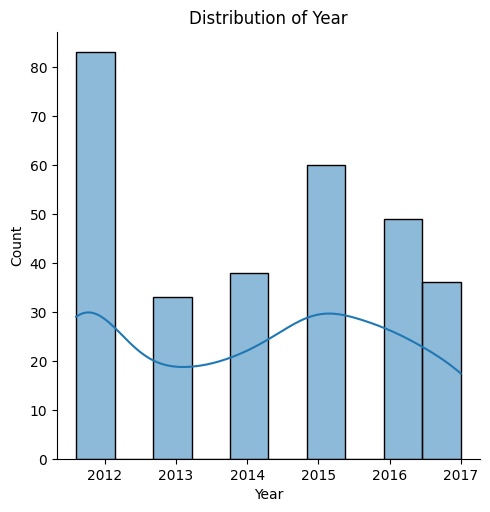

<Figure size 1000x600 with 0 Axes>

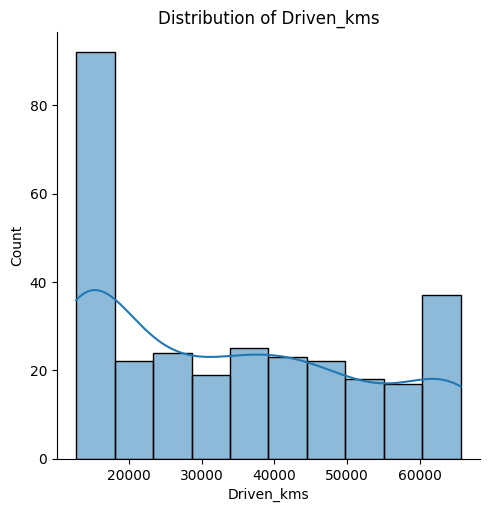

<Figure size 1000x600 with 0 Axes>

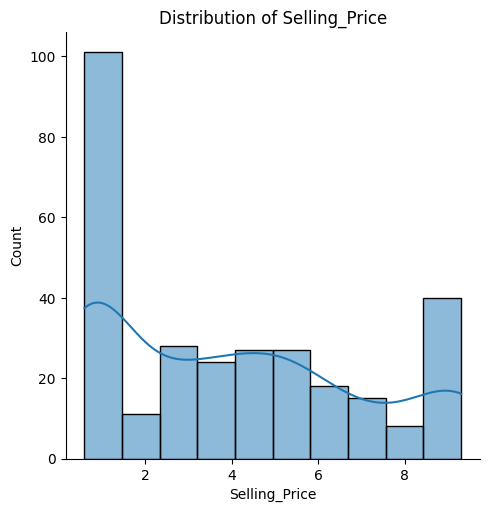

<Figure size 1000x600 with 0 Axes>

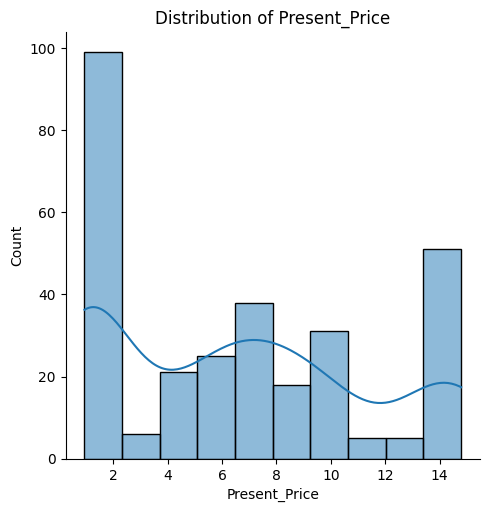

In [33]:
numerical_features = ['Year', 'Driven_kms', 'Selling_Price', 'Present_Price']
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.displot(data=df, x=feature, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

# FEATURE SELECTION

<Axes: >

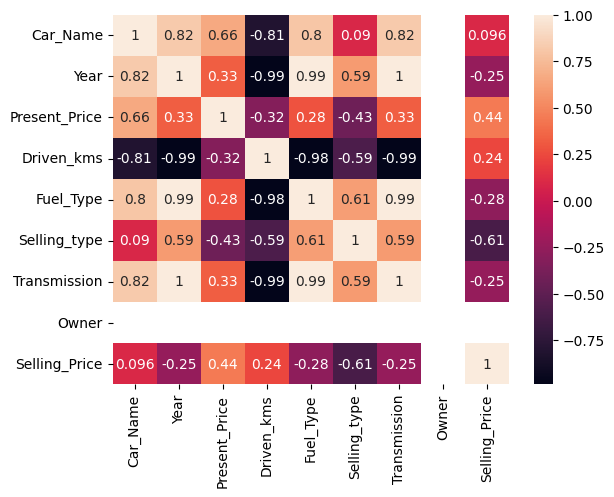

In [34]:
sns.heatmap(df1.corr(),annot=True)

C:\Users\bhautik\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


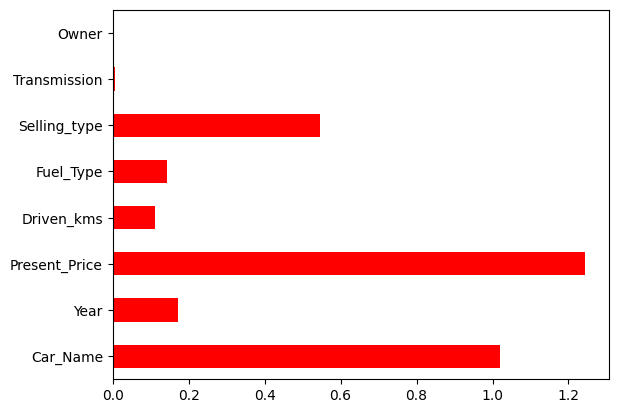

In [36]:
m = mutual_info_regression(x,y)
v = pd.Series(m,df1.columns[0:len(df1.columns)-1])
v.plot(kind = "barh", color = "red")
plt.show()

In [44]:
x1 = df1[['Car_Name','Present_Price','Selling_type']]
y1 = y

In [45]:
x_train,x_test,y_train,y_test = train_test_split(x1,y1,test_size=0.3,random_state=99)

# MODEL IMPLEMENTATION

# LINEAR REGRESSION

In [46]:
L = LinearRegression()

In [47]:
L.fit(x_train,y_train)

LinearRegression()

In [48]:
y_pred = L.predict(x_test)

In [49]:
r2_score(y_test,y_pred)

0.6575946269472634

In [71]:
mean_squared_log_error(y_test,y_pred)

0.06394719222176887

In [59]:
x_train,x_test,y_train,y_test = train_test_split(x1,y1,test_size=0.3,random_state=99)

# HERE WE APLLY ONOTHER MODEL FOR GOOD ACCURACY

# RANDOM FOREST

In [64]:
r = RandomForestRegressor()

In [65]:
par = {"n_estimators" : [10,20,50,90],"criterion" : ["squared_error", "absolute_error", "friedman_mse", "poisson"] ,"max_depth" : [1,2,3,4,5,6]}

In [66]:
g = GridSearchCV(r,par,cv=4)

In [67]:
g.fit(x_train,y_train)

C:\Users\bhautik\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\bhautik\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\bhautik\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\bhautik\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: Dat

GridSearchCV(cv=4, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'friedman_mse', 'poisson'],
                         'max_depth': [1, 2, 3, 4, 5, 6],
                         'n_estimators': [10, 20, 50, 90]})

In [68]:
y_pred = g.predict(x_test)

In [69]:
r2_score(y_test,y_pred)

0.8001006298763766

In [70]:
mean_squared_log_error(y_test,y_pred)

0.06394719222176887

# DECISION TREE

In [73]:
d = DecisionTreeRegressor()

In [74]:
p = {"criterion" : ["squared_error", "friedman_mse", "absolute_error","poisson"],"max_depth":[1,2,3,4,5,6,7]}

In [78]:
g1 = GridSearchCV(d,p,cv=4)

In [79]:
g1.fit(x_train,y_train)

GridSearchCV(cv=4, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7]})

In [81]:
y_pred = g1.predict(x_test)

In [82]:
r2_score(y_test,y_pred)

0.6755980577034677

In [83]:
mean_squared_log_error(y_test,y_pred)

0.0858419142630745